<a href="https://colab.research.google.com/github/hima2810/github-slideshow/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l01c01_introduction_to_colab_and_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2018 The TensorFlow Authors.

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import tensorflow as tf
import numpy as np

In [37]:
width=224
height=224
batch_size=32
data_dir=r"/content/drive"

In [38]:
training=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset='training',
    seed=123,
    image_size=(height,width),
    batch_size=batch_size
)

Found 194 files belonging to 4 classes.
Using 136 files for training.


In [39]:
validation=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset='validation',
    seed=123,
    image_size=(height,width),
    batch_size=batch_size
)

Found 194 files belonging to 4 classes.
Using 58 files for validation.


In [40]:
classes=training.class_names
classes

['.Trash-0', '.file-revisions-by-id', '.shortcut-targets-by-id', 'MyDrive']

In [41]:
training

<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

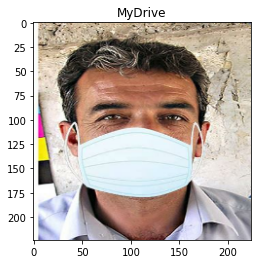

In [42]:
import matplotlib.pyplot as plt
for images, labels in training.take(1):
  plt.imshow(images[1].numpy().astype('uint8'))
  plt.title(classes[labels[1]])

In [43]:
from tensorflow.keras.applications import MobileNetV2

In [44]:
model= MobileNetV2(weights='imagenet')

In [45]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [46]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

Training

In [16]:
face_mask_detection=model.fit(training,validation_data=validation,epochs=3)

Epoch 1/3


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


5/5 [==============================] - 54s 5s/step - loss: 3.4138 - accuracy: 0.5735 - val_loss: 56.6018 - val_accuracy: 0.0000e+00
Epoch 2/3
5/5 [==============================] - 2s 362ms/step - loss: 0.0891 - accuracy: 1.0000 - val_loss: 51.0498 - val_accuracy: 0.0000e+00
Epoch 3/3
5/5 [==============================] - 2s 367ms/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 42.2012 - val_accuracy: 0.0000e+00


In [47]:
img=tf.keras.preprocessing.image.load_img('new2.PNG.jpg',target_size=(height, width))
image_array=tf.keras.preprocessing.image.img_to_array(img)
image_array=tf.expand_dims(image_array,0)
image_array.shape

TensorShape([1, 224, 224, 3])

In [48]:
predictions=model.predict(image_array)
score=tf.nn.softmax(predictions[0])

In [49]:
print(score)

tf.Tensor(
[0.00099836 0.0009984  0.00099835 0.00099835 0.00099836 0.00099835
 0.00099835 0.00099835 0.00099835 0.00099838 0.00099835 0.00099835
 0.00099837 0.00099836 0.00099835 0.00099835 0.00099836 0.00099835
 0.00099835 0.00099836 0.00099837 0.00099835 0.00099835 0.00099835
 0.00099836 0.00099836 0.00099835 0.00099835 0.00099835 0.00099835
 0.00099835 0.00099836 0.00099835 0.00099835 0.00099835 0.00099841
 0.00099835 0.00099836 0.00099835 0.00099836 0.00099835 0.00099835
 0.00099835 0.00099835 0.00099835 0.00099835 0.00099835 0.00099835
 0.00099835 0.00099835 0.00099835 0.00099835 0.00099835 0.00099838
 0.00099835 0.00099835 0.00099835 0.00099835 0.00099836 0.00099836
 0.00099835 0.00099835 0.00099835 0.00099835 0.00099835 0.00099835
 0.00099835 0.00099835 0.00099835 0.00099835 0.00099835 0.00099839
 0.00099835 0.00099835 0.00099838 0.00099835 0.00099835 0.00099836
 0.00099835 0.00099838 0.00099836 0.00099836 0.00099836 0.00099836
 0.00099839 0.00099835 0.00099837 0.00099835 0.0009

In [50]:
model.save('dummy.model',save_format="h5")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [59]:
import tensorflow as tf
tf.version.VERSION

'2.5.0'

In [60]:
from tensorflow.keras.models import load_model
detector = load_model('dummy.model')

In [64]:
!git clone http://github.com/opencv/opencv.git
!mkdir Video

fatal: destination path 'opencv' already exists and is not an empty directory.
mkdir: cannot create directory ‘Video’: File exists


In [68]:
!pip install ffmpeg-python

from IPython.display import HTML, Javascript, display
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import io
import ffmpeg
video_file_test='/content/Video/osy_test.mp4'
VIDEO_HTML="""
<script>
var my_div=document.createElement(“DIV”);
var my_p=document.createElement(“p”);
var my_btn=document.createElement(“BUTTON”);
var my_btn_txt=document.createTextNode(“Press to start recording”);
my_btn.appendChild(my_btn_txt);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);
var base64data=0;
var reader;
var recorder,videoStream;
var recordButton=my_btn;
var handleSuccess=function(stream)
{
videoStream=stream;
var options={
mimeType:’video/webm;codecs=vp9’
};
recorder=new MediaRecorder(stream,options);
recorder.ondataavailable=function(e) {
var url=URL.createObjectURL(e.data);
var preview=document.createElement(‘video’);
preview.controls=true;
preview.src=url;
document.body.appendChild(preview);
reader =new FileReader():
reader.readAsDataURL(e.data);
reader.onloadend=function(){
base64data=reader.result;
}
};
recorder.start();
};
recordButton.innerText=”Recording……press to stop”;
navigator.mediaDevices.getUserMedia({video:true}).then(handleSuccess);
function toggleRecording(){
if(recorder && recorder.state==”recording”){
recorder.stop();
videoStream.getVideoTracks()[0].stop();
recordButton.innerText=”Saving the recording…….Please wait!”
}
}
function sleep(ms){
return new Promise(resolve=>setTimeout(resolve,ms));
}
var data=new Promise(resolve=>{
recordButton.onclick=()=>{
toggleRecording()
sleep(2000).then(()=>{
//wait 2000ms for the data to be available
resolve(base64data.toString())
});
}
});

</script>
"""



def start_webcam():
  js=Javascript('''
    async function startWebcam() {
      const div=document.createElement('div');
      const video=document.createElement('video');
      video.style.display='block';
      const stream=await navigator.mediaDevices.getUserMedia({video: true});
      document.body.appendChild(div);
      div.appendChild(video);
      video.scrObject=stream;
      await video.play();
      google.colab.output.setIframeHeight(document.documentElement.srollHeight, true);
      
      return;
          }
          ''')
  
  display(js)
  data=eval_js('startWebcam()')


start_webcam()

def get_video():
  display(HTML(VIDEO_HTML))
  data=eval_js("data")
  binary=b64decode(data.split(',')[1])

  return binary

In [66]:
videofile=get_video()
with open(video_file_test, 'wb') as f:
  f,write(videofile)

MessageError: ignored

In [67]:
import tensorflow as tf
import cv2
import numpy

cap=cv2.VideoCapture(video_file_test)
classifier=cv2.CascadeClassifier(cv2.data.haarcascades='haarcascade_frontalface_default_xml')

SyntaxError: ignored

In [ ]:
from google.colab.patches import cv2_imshow
while True:
  (success,frame)= cap.read()
  new_image=cv2.resize(frame, (frame.shape[1]//1,frame.shape[0]//1))
  face=classifier.detectMultiScale(new_image)
  for x,y,w,h in face:
    try:
      face_img=new_image[y:x+h, x:x+w]
      resized=cv2.resize(face_img,(224,224))
      image_array=tf.keras.preprocessing.image.img_to_array(resized)
      image_array=tf.expand_dims(image_array,0)
      predictions= detector.predict(image_array)
      score=tf.nn.softmax(predictions[0])
      label=numpy.argmax(score)
    except Exception as 0:
      print("bad frame")

    if label==0:
      cv2.rectangle(new_image,(x,y),(x+w,y+h),(0,255,0),2)  


In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l01c01_introduction_to_colab_and_python.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l01c01_introduction_to_colab_and_python.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>